# libraries

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.utils import shuffle
from skimage.transform import resize
import seaborn as sns

### Read file name in 4 folders

In [2]:
bheem=glob.glob('bheem/*jpg')
mr_bean=glob.glob('mr bean/*jpg')
spiderman=glob.glob('spiderman/*jpg')
tom_jerry=glob.glob('tom and jerry/*jpg')

### Read and store in a variable

In [3]:
images=[]
labels=[]
for i in bheem:
    img=plt.imread(i)
    images.append(img)
    labels.append(1)
for i in mr_bean:
    img=plt.imread(i)
    images.append(img)
    labels.append(2)
for i in spiderman:
    img=plt.imread(i)
    images.append(img)
    labels.append(3)
for i in tom_jerry:
    img=plt.imread(i)
    images.append(img)
    labels.append(4)

### Plot some of the images

In [4]:
label_names={1:'bheem',2:'mr_bean',3:'spiderman',4:'tom and jerry'}

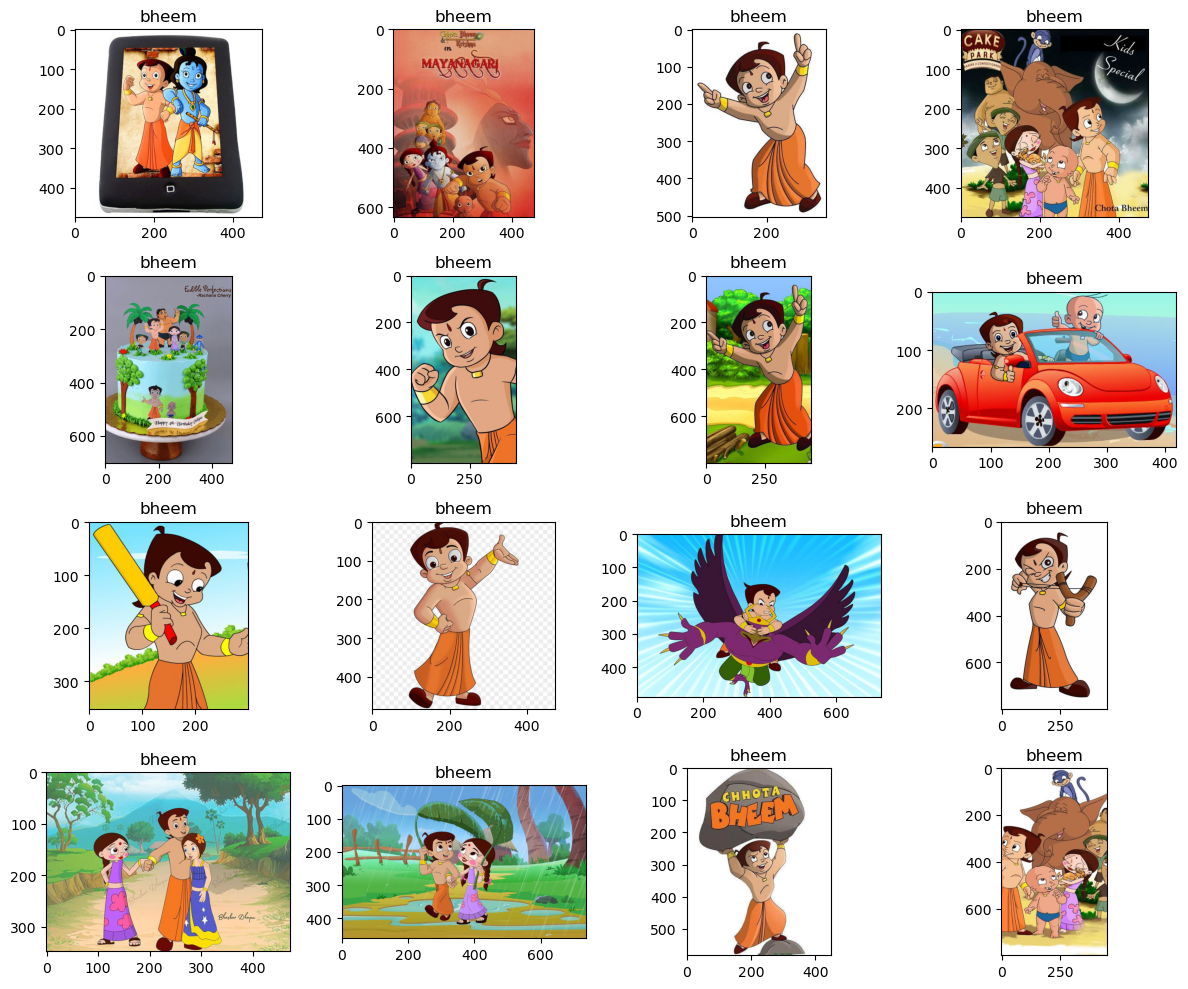

In [9]:
plt.figure(figsize=(12,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.title(label_names[labels[i]])
plt.tight_layout() 

### Shuffle images and labels 

In [10]:
images,labels=shuffle(images,labels)

### Plot the images once again

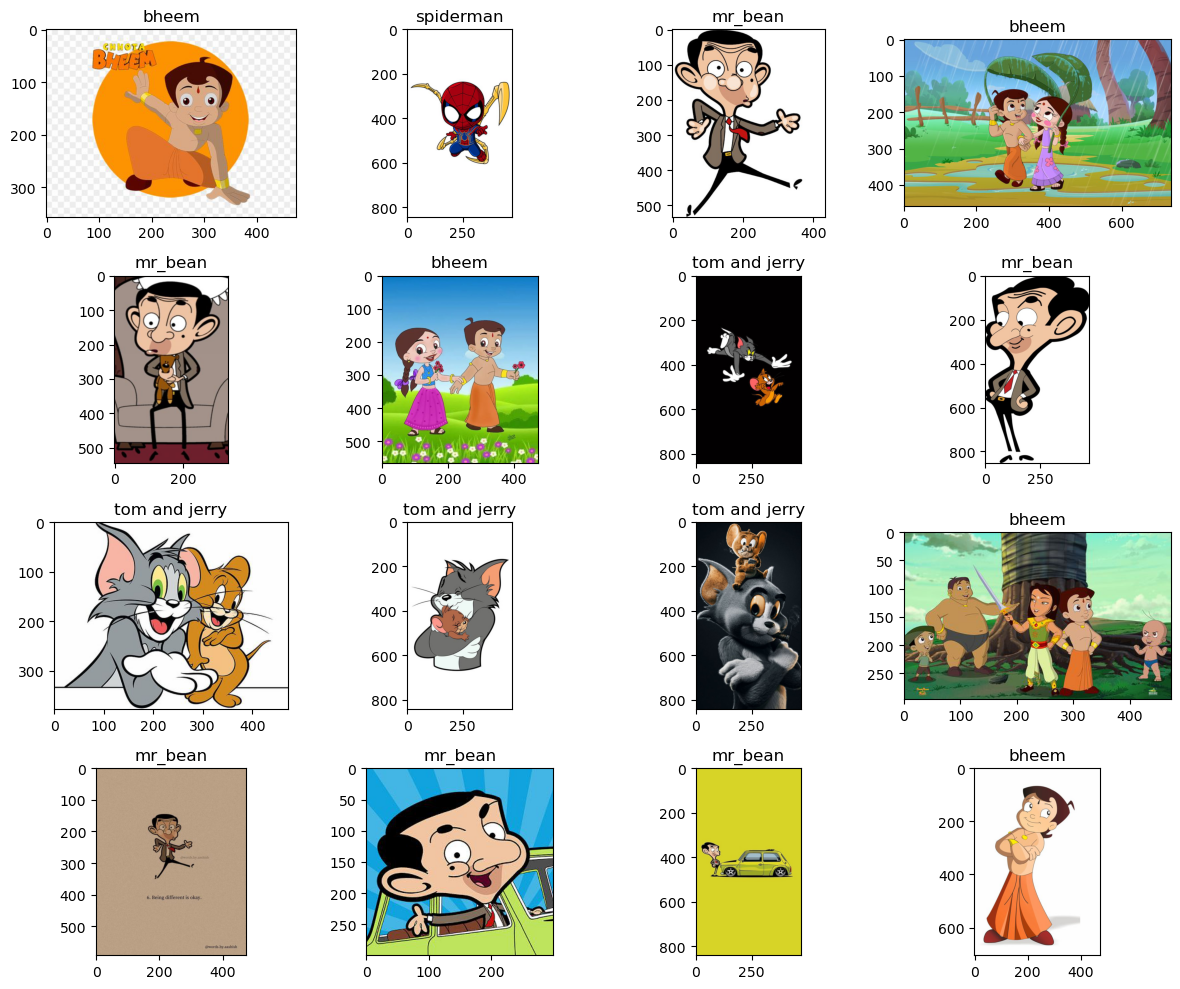

In [11]:
plt.figure(figsize=(12,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.title(label_names[labels[i]])
plt.tight_layout() 

### Shape of some of the images

In [13]:
for i in range(10):
    print(images[i].shape)

(356, 474, 3)
(842, 474, 3)
(532, 433, 3)
(460, 736, 3)
(544, 329, 3)
(566, 473, 3)
(842, 474, 3)
(852, 474, 3)
(378, 473, 3)
(842, 474, 3)


### Resize all the images to a same height and width

In [14]:
X=[]
for i in images:
    X.append(resize(i,(300,300,3)))

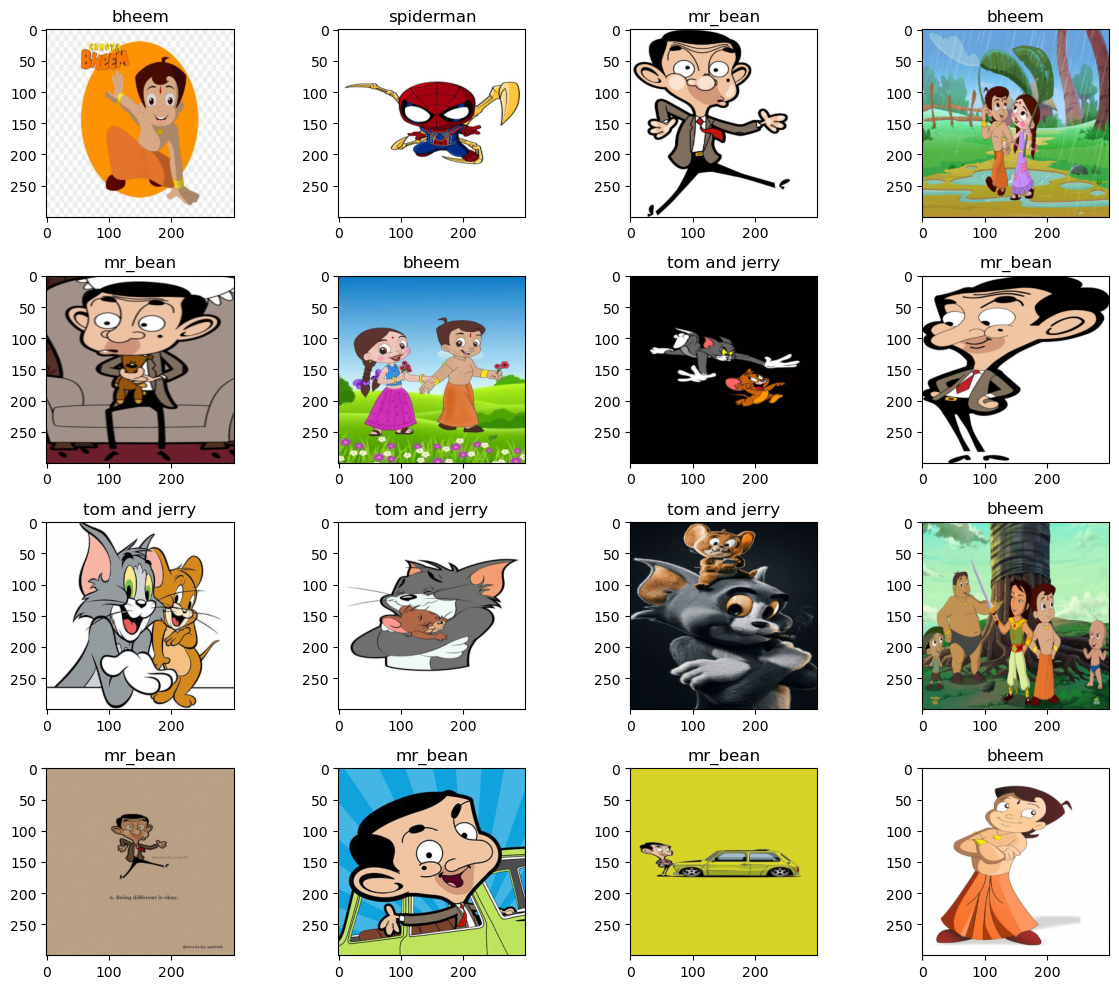

In [15]:
plt.figure(figsize=(12,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X[i])
    plt.title(label_names[labels[i]])
plt.tight_layout() 

### Convert images and labels to numpy array and store them as X and y variables



In [16]:
X=np.array(X)
y=np.array(labels)

### Reshape the images to 1 dimension

In [17]:
X.shape

(144, 300, 300, 3)

In [18]:
a,b,c,d=X.shape

In [19]:
X=X.reshape((a,b*c*d))

In [21]:
X[0]

array([0.99607843, 0.99607843, 0.99607843, ..., 0.99999972, 0.99999972,
       0.99999972])

### Train test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

### Create SVM Model and train it

In [24]:
from sklearn.svm import SVC

In [25]:
model=SVC()

In [33]:
model.fit(X_train,y_train)

SVC()

In [34]:
model.score(X_train,y_train)

0.9304347826086956

### Make predictions with X_test

In [35]:
y_pred=model.predict(X_test)

# plot sum predictions

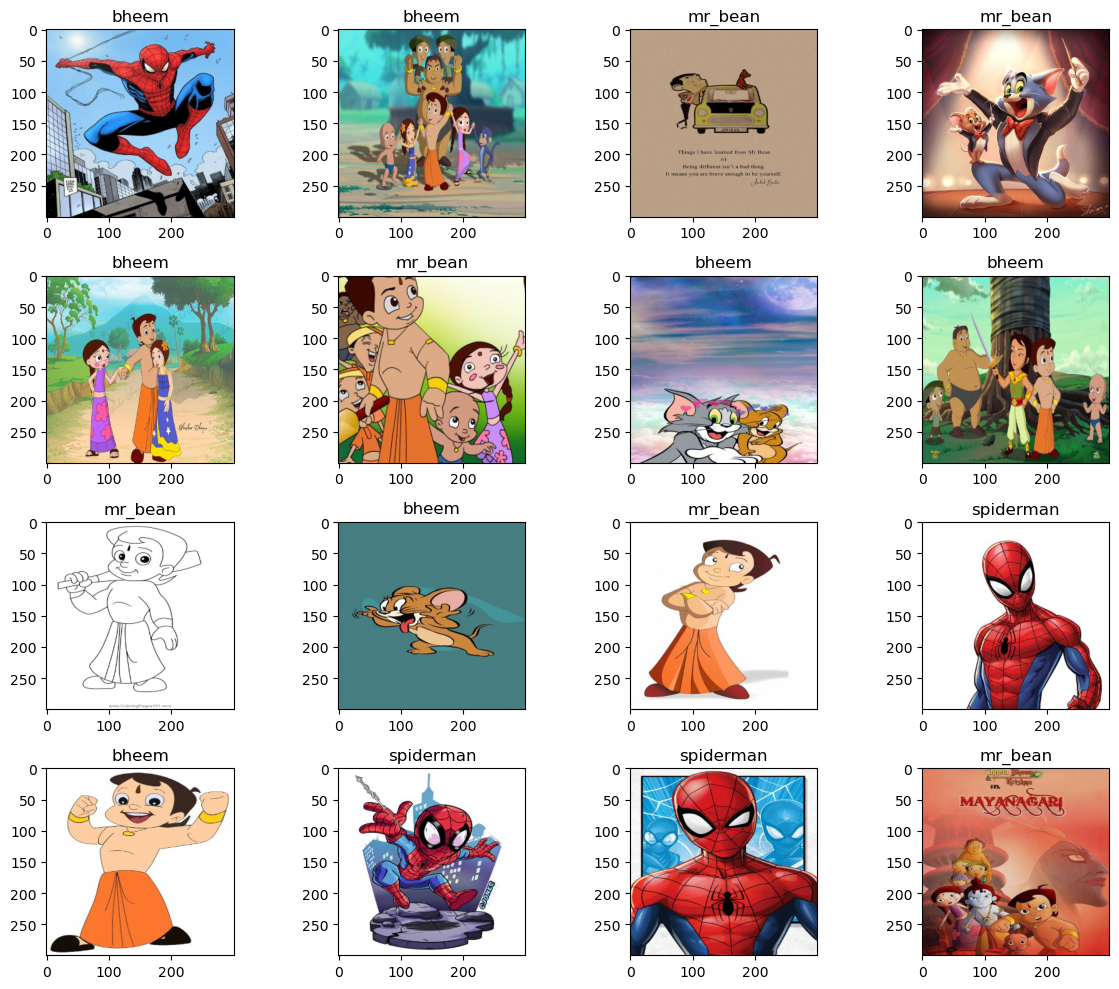

In [36]:
plt.figure(figsize=(12,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_test[i].reshape(300,300,3))
    plt.title(label_names[y_pred[i]])
plt.tight_layout() 

### Evaluate the model(metrics)

In [37]:
from sklearn import metrics

<Axes: >

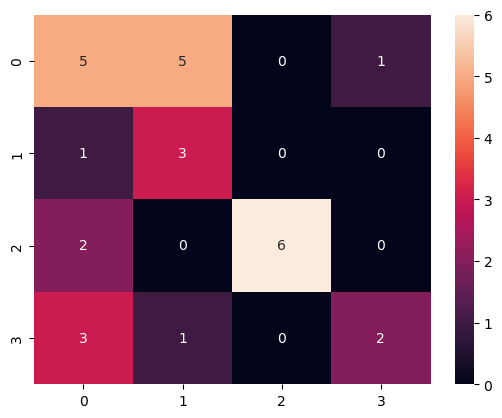

In [40]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)

In [41]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.45      0.45      0.45        11
           2       0.33      0.75      0.46         4
           3       1.00      0.75      0.86         8
           4       0.67      0.33      0.44         6

    accuracy                           0.55        29
   macro avg       0.61      0.57      0.55        29
weighted avg       0.63      0.55      0.56        29

